# **Keras Functional API**

**A way to create models** that are more flexible than the **_keras.Sequential API_**. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

In [2]:
import numpy as np
import keras
from keras import layers
from keras import ops

The m**ain idea is that a deep learning model** is usually a directed acyclic **graph (DAG) of layers**. So the functional API is a way to **build graphs of layers**.

**Architecture:**

Input: 784-dimensional vectors  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
[Dense (64 units, ReLU activation)]  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
[Dense (64 units, ReLU activation)]  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
[Dense (10 units, Softmax activation)]  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
Output: logits of a probability distribution over 10 classes


This is a **basic graph with three layers**.

In [3]:
inputs = keras.Input(shape=(784,))

In [4]:
inputs.shape

(None, 784)

In [5]:
inputs.dtype

'float32'

In [6]:
dense = layers.Dense(64, activation='relu')
x = dense(inputs)

The **"layer call"** action is like **drawing an arrow from "inputs"** to this layer you created. You're **"passing" the inputs** to the **dense layer**, and you **get x as the output**.

In [7]:
# Let's add a few more layers to the graph of layers:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

At this point, you **can create a Model** by **specifying its inputs and outputs** in the **graph of layers**:

In [8]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [9]:
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

You can also **plot the model as a graph**:

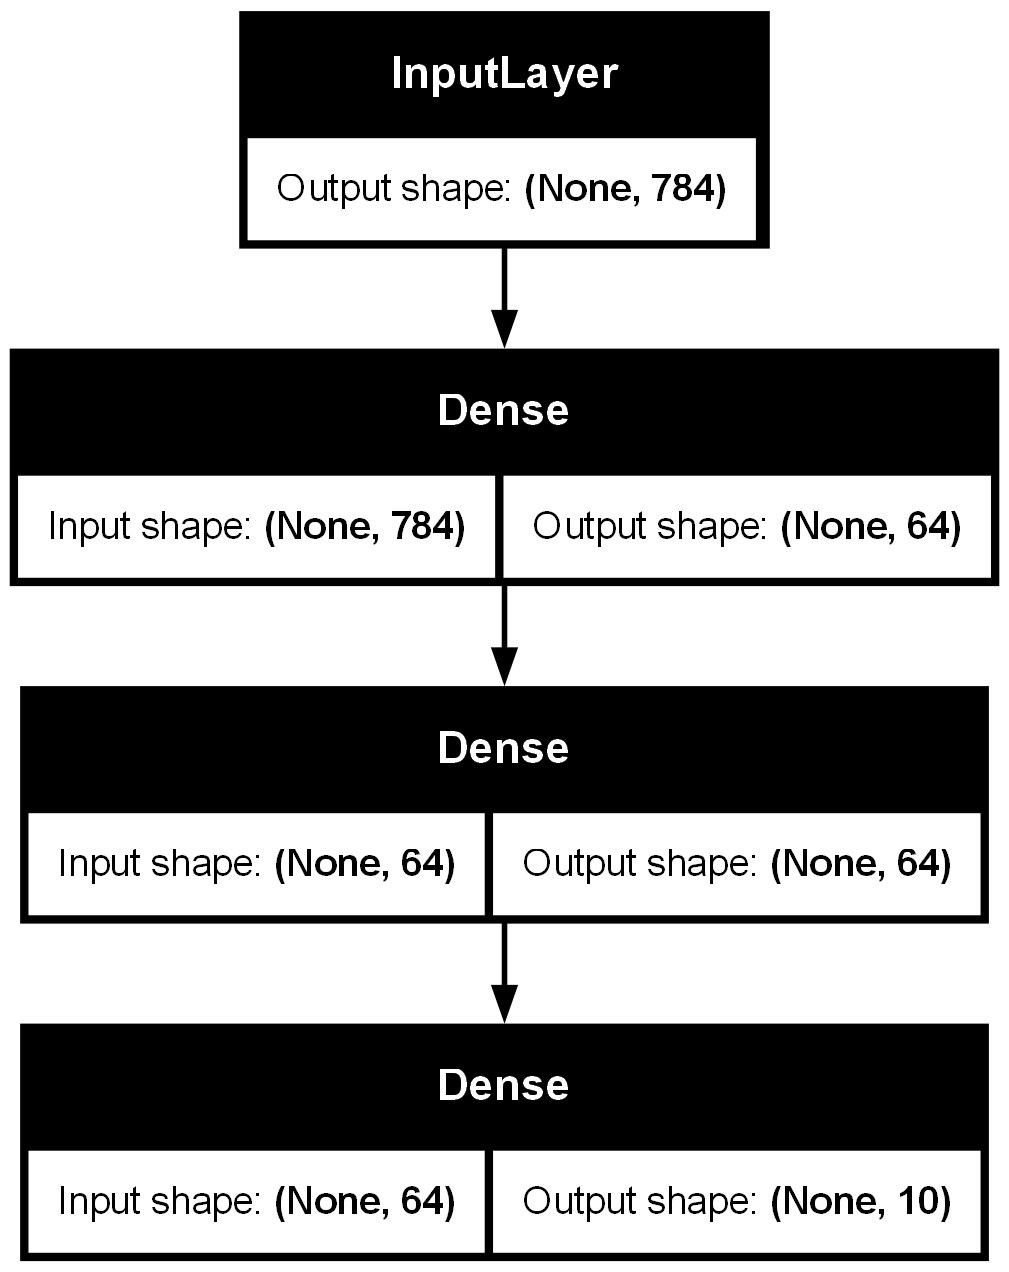

In [10]:
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

A **"graph of layers"** is an **intuitive mental image** for a **deep learning model**, and the **functional API** is a way to create models that closely mirrors this.

## **Training, evaluation, and inference**

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9016 - loss: 0.3494 - val_accuracy: 0.9477 - val_loss: 0.1858
Epoch 2/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9519 - loss: 0.1646 - val_accuracy: 0.9578 - val_loss: 0.1398
313/313 - 1s - 2ms/step - accuracy: 0.9586 - loss: 0.1368
Test loss: 0.13680636882781982
Test accuracy: 0.9585999846458435


## **Save and serialize**

**Saving the model and serialization** work the same way for models built using the **functional API as they do for Sequential models**. The standard way to save a functional model is to call **_model.save()_** to **save the entire model as a single file**. You can later recreate the same model from this file, even if the code that built the model is no longer available.

In [12]:
model.save("my_model.keras")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("my_model.keras")

### **Use the same graph of layers to define multiple models**

In the functional API, models are created by specifying their inputs and outputs in a graph of layers. That means that **a single graph of layers** can be **used to generate multiple models**.


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_4          │ (None, 16)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,672 (72.94 KB)

 Trainable params: 18,672 (72.94 KB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_4          │ (None, 16)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 4, 4, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_16             │ (None, 6, 6, 16)       │           160 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_17             │ (None, 8, 8, 32)       │         4,640 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_18             │ (None, 26, 26, 16)     │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_19             │ (None, 28, 28, 1)      │           145 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,241 (110.32 KB)

 Trainable params: 28,241 (110.32 KB)

 Non-trainable params: 0 (0.00 B)

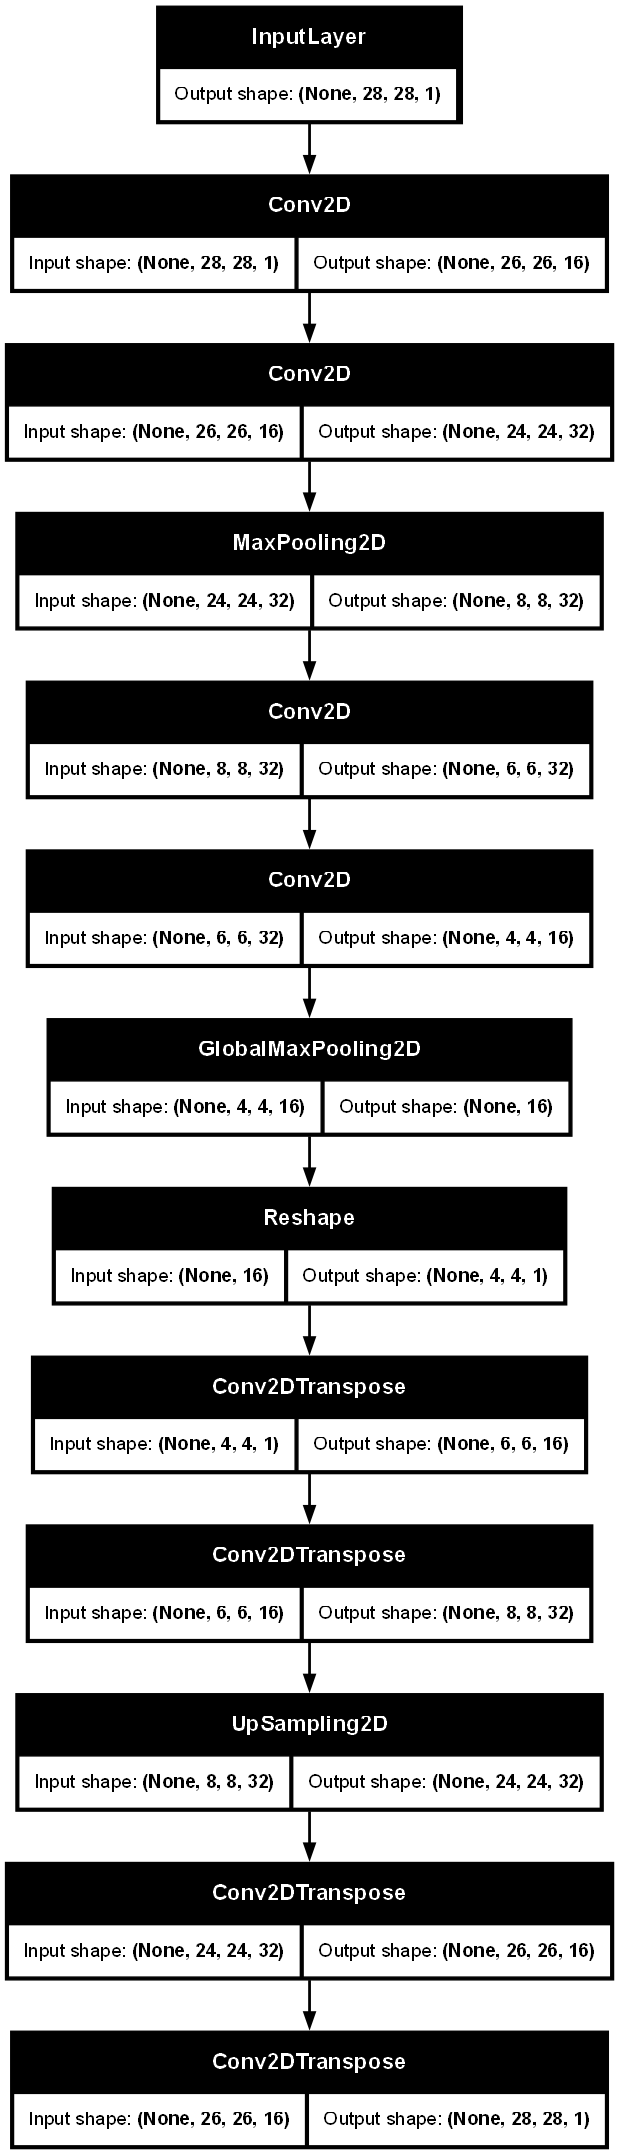

In [17]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

keras.utils.plot_model(encoder, "First.png", show_shapes=True, dpi=100)

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

keras.utils.plot_model(autoencoder, "Second.png", show_shapes=True, dpi=100)

### **All models are callable, just like layers**

**You can treat any model as if it were a layer** by invoking it on an Input or on the output of another layer. By calling a model you aren't just **reusing the architecture** of the model, you're also reusing its weights.

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_8        │ (None, 1)         │        129 │ input_layer_11[0… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_9        │ (None, 1)         │        129 │ input_layer_11[0… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_10       │ (None, 1)         │        129 │ input_layer_11[0… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_2 (Average) │ (None, 1)         │          0 │ functional_8[0][… │
│                     │                   │            │ functional_9[0][… │
│                     │                   │            │ functional_10[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 387 (1.51 KB)

 Trainable params: 387 (1.51 KB)

 Non-trainable params: 0 (0.00 B)

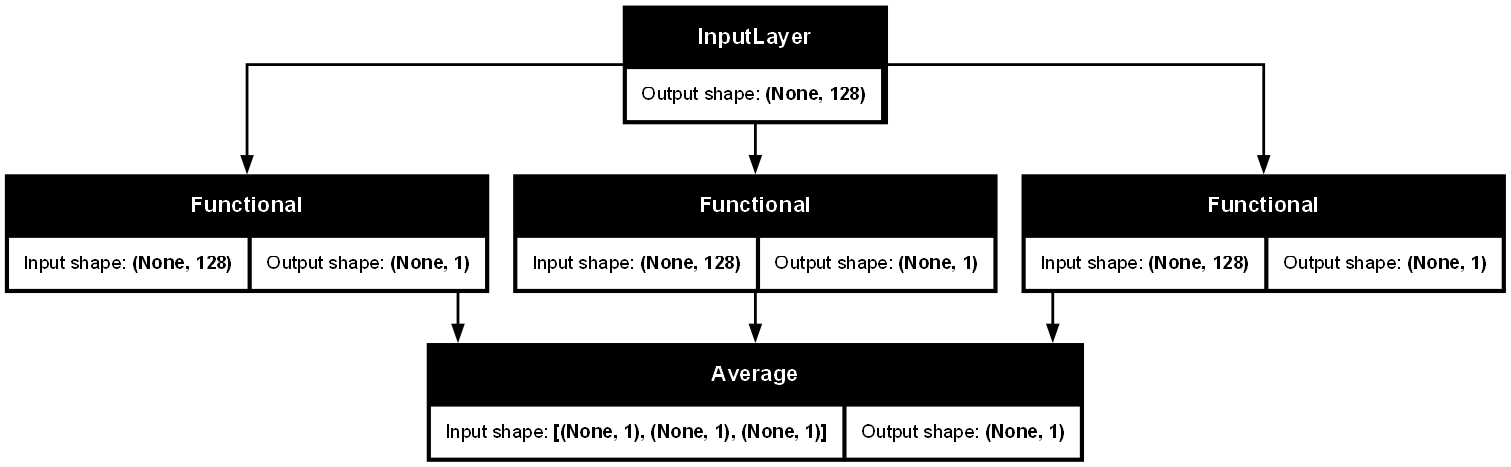

In [5]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)


model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

ensemble_model.summary()

keras.utils.plot_model(ensemble_model, "Ensemble_Model.png", show_shapes=True, dpi=100)

This model is an ensemble:
- It takes the same input.
- Three different models evaluate it.
- The final output is the average of their predictions.

### **Manipulate complex graph topologies**

With Sequential, you can only "stack" layers in a straight line: input → hidden → output.
With the **Functional API**, however, you can:

- **manage multiple inputs and multiple outputs** in the same model,
- **create complex graphs** (nonlinear connections, jumps, merges, etc.).

In [6]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs={"priority": priority_pred, "department": department_pred},
)


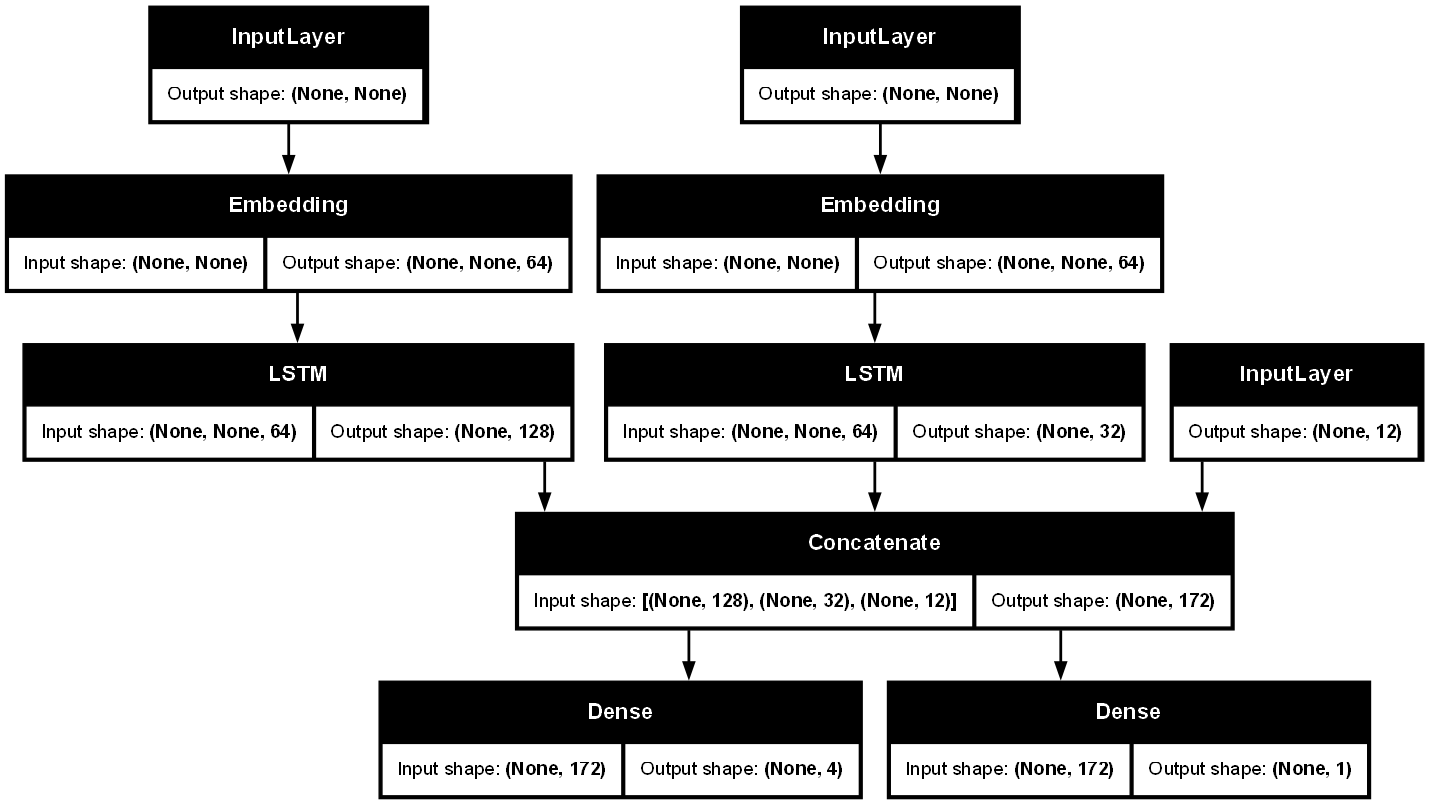

In [8]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True, dpi=100)

You can assign **different losses to each output** and also weight them differently.

In [9]:
model.compile(
    optimizer="rmsprop",
    loss={
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights={"priority": 1.0, "department": 0.2},
)


#### **ResNet** 

**Residual connections**: Instead of just going from one layer to the next, **you can add (sum) the results of different layers**.

In [11]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)    │ (None, 32, 32, 3) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 30, 30,    │        896 │ img[0][0]         │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 28, 28,    │     18,496 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 9, 9, 64)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 9, 9, 64)  │     36,928 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 9, 9, 64)  │     36,928 │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 9, 9, 64)  │          0 │ conv2d_3[0][0],   │
│                     │                   │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 9, 9, 64)  │     36,928 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 9, 9, 64)  │     36,928 │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 9, 9, 64)  │          0 │ conv2d_5[0][0],   │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 7, 7, 64)  │     36,928 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ conv2d_6[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 256)       │     16,640 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 10)        │      2,570 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 223,242 (872.04 KB)

 Trainable params: 223,242 (872.04 KB)

 Non-trainable params: 0 (0.00 B)

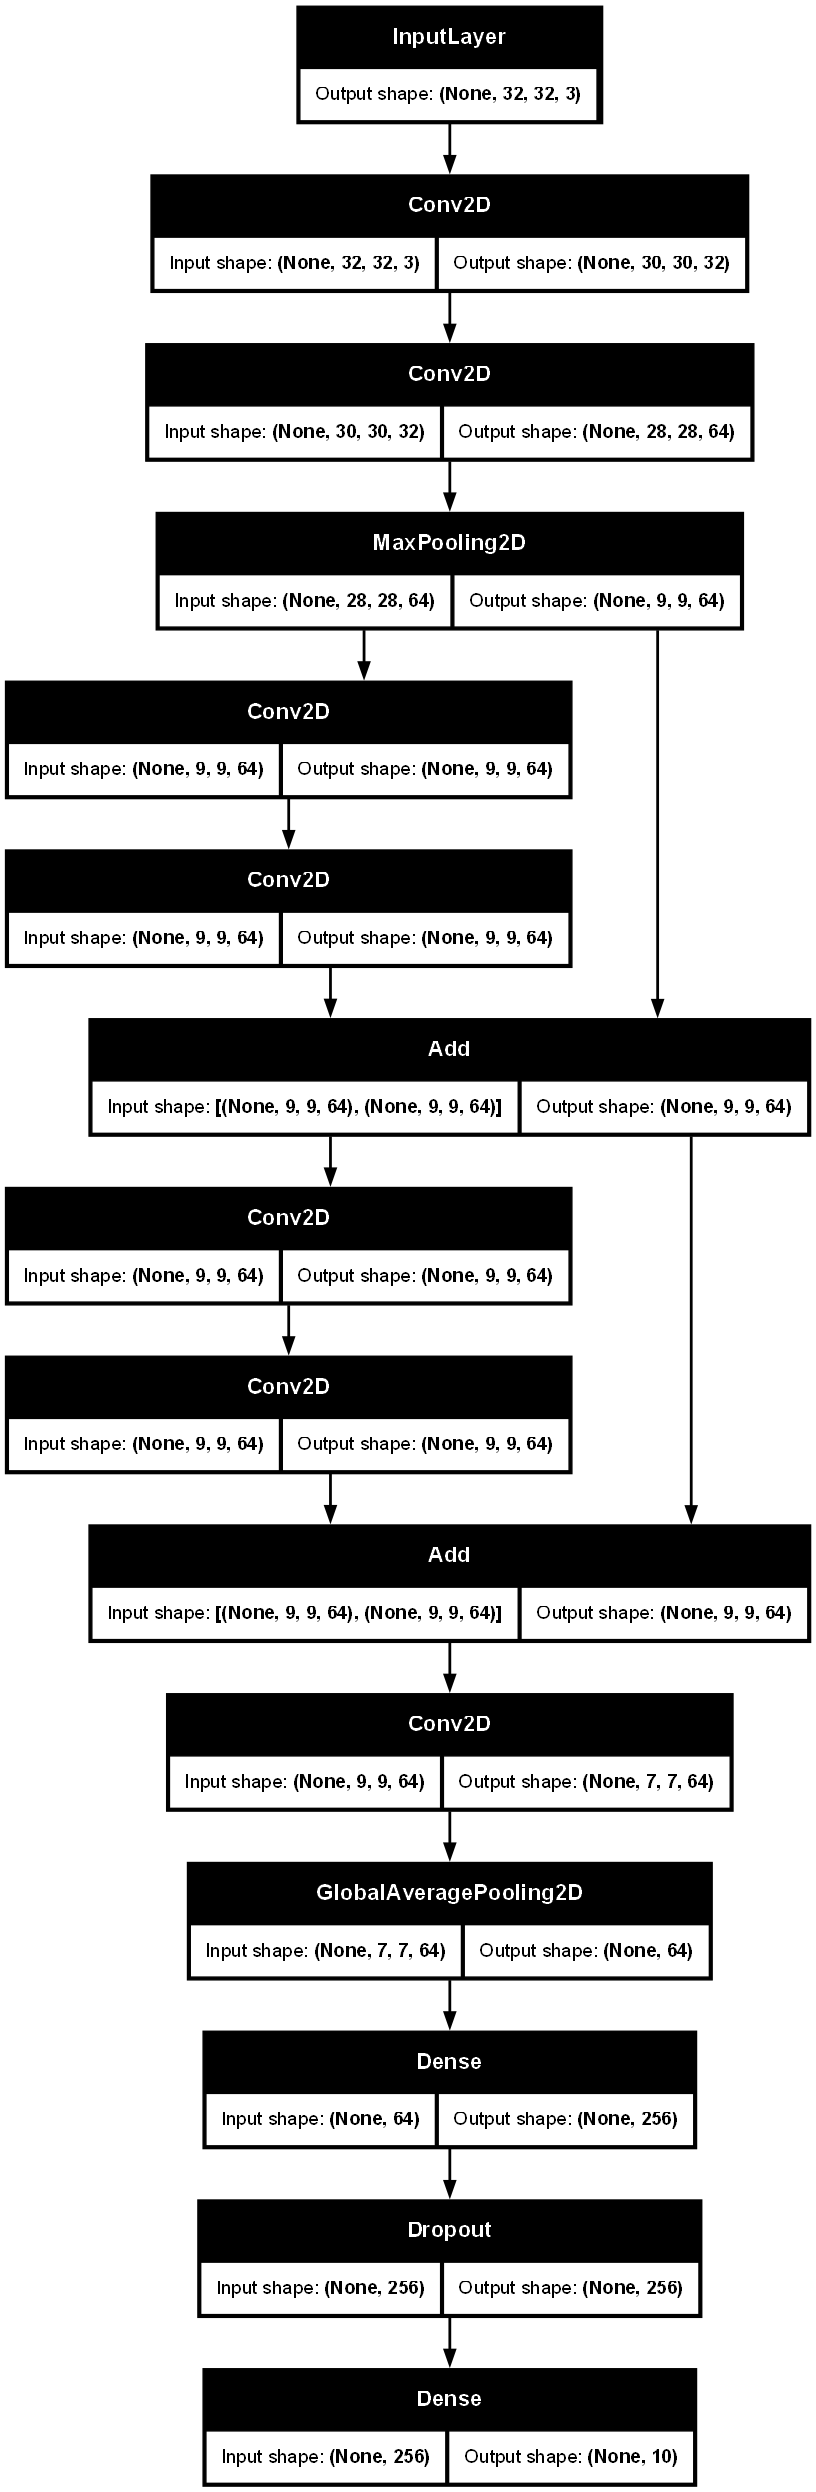

In [12]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True, dpi=100)

### **Shared layers**

**A shared layer** is the same **Keras Layer object used multiple times** within the graph.
This means that the **layer's weights are the same** across all branches that use it.
When the model is trained, the gradients update only one set of weights, which is shared.

In [13]:
# Embedding for 1000 unique words mapped to 128-dimensional vectors
shared_embedding = layers.Embedding(1000, 128)

# Variable-length sequence of integers
text_input_a = keras.Input(shape=(None,), dtype="int32")

# Variable-length sequence of integers
text_input_b = keras.Input(shape=(None,), dtype="int32")

# Reuse the same layer to encode both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

### **Extract and reuse nodes in the graph of layers**

A model defined with the **Functional API is a static graph**: each layer and each output are recorded **as nodes and edges**.

So you can:
- access any **intermediate node**,
- **build a new model** that takes the same original input as input but exits mid-network.

### **Extend the API using custom layers**



## Basic structure of a custom layer

1. **`__init__`**

* Define the layer's hyperparameters (e.g., number of units).
* Don't create weights yet.

2. **`build(input_shape)`**

* Here you define the layer's weights (with `self.add_weight`).
* `input_shape` tells you the input size.
* It's called automatically the first time you pass real data.

3. **`call(inputs)`**

* Here you write the forward pass logic, i.e., what the layer does with the data.

---

### Example: Simplified Dense implementation

In [14]:
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super().__init__()
        self.units = units  # numero di neuroni

    def build(self, input_shape):
        # Definisco i pesi (matrice W e bias b)
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer="random_normal",
            trainable=True,
        )

    def call(self, inputs):
        # Forward pass = xW + b
        return ops.matmul(inputs, self.w) + self.b


In [15]:
inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)
model = keras.Model(inputs, outputs)



In [16]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense (CustomDense)      │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50 (200.00 B)

 Trainable params: 50 (200.00 B)

 Non-trainable params: 0 (0.00 B)

### **When to use the Functional API**

The **Functional API** is ideal when:

* the model can be described as a **directed acyclic graph (DAG)** of layers (almost all CNNs, MLPs, Transformers, ResNets, etc.);
* you want something **simpler, more readable, and safer** than writing classes;
* you want to take advantage of the extra benefits:

* **Static validation** of the input shape (if you get the wrong shape, Keras tells you immediately during construction);
* **Visualization** of the model as a graph (`plot_model`);
* **Extraction of intermediate nodes** (`layer.output` for feature extraction);
* **Full serialization** (save the model in a `.h5` or `.keras` file and reload it without having to rewrite code).

It's more "high-level" and closer to how you would draw the model on paper.

### **When to Use Model Subclassing**

The **Model` subclass** is useful when:

* you need to build **dynamic architectures** that aren't a static DAG:

* Recursive networks, Tree-RNNs, models that depend on `if/else` logic,
* Models with complex temporal loops or different behavior depending on the input.
* you want to have **complete control** over what happens in the forward pass (`call`).
* you want to mix ready-made layers with custom mathematical operations or pure Python.
It's more "low-level": you write the logic yourself, but you lose inspectability and easy serialization (you need to implement `get_config()` and `from_config()` manually).

---

## Quick comparison

### Functional API

```python
inputs = keras.Input(shape=(32,))
x = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10)(x)
model = keras.Model(inputs, outputs)
```

### Subclassing

```python
class MLP(keras.Model): 
def __init__(self): 
super().__init__() 
self.d1 = layers.Dense(64, activation="relu") 
self.d2 = layers.Dense(10) 

def call(self, inputs): 
return self.d2(self.d1(inputs))

mlp = MLP()
_ = mlp(tf.zeros((1, 32))) # a first call is needed to create the weights
```

---

## Mix & Match

You don't have to choose just one style:

* You can use a **Functional model** as a subcomponent in a subclassed model,
* or use a **custom subclassed layer** within a Functional model.

Example:

```python
inputs = keras.Input((10, 5))
x = layers.Conv1D(32, 3)(inputs)
outputs = CustomRNN()(x) # a subclassed layer
model = keras.Model(inputs, outputs)
```

---

## Key Summary

* **Functional API** → better when possible: safer, more inspectable, more serializable.
* **Model Subclassing** → is used for "outside the box" dynamic models that don't fit into a static graph.
* **They can be combined**: Functional for the structured part, Subclassing for the dynamic pieces.